In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### PLOTTING FUNCTIONS

In [2]:
# Function to plot specified variable per run
def plot_all_runs(df_list, var, legen= True, color=None):
    label = var
    for df in df_list:
        df[var].plot(label=label, color=color) if color else df[var].plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    if legen:
        plt.legend()


def plot_difference(df_list, var1, var2, legend=True):
    label = str(var1) + " - " + str(var2)
    for df in df_list:
        diff = df[var1] - df[var2]
        diff.plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel("Amount")
    if legend:
        plt.legend()

def plot_avg_per_type(df_list, agent_type, var, legend = True, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].mean().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    if legend:
        plt.legend()

def plot_total_per_type(df_list, agent_type, var,legend = True, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].sum().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    if legend:
        plt.legend()


### READ DATA

#### Model variables

In [3]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("model"):
        df = pd.read_csv("results/" + file)
        model_vars_df_list.append(df)

# Show first dataframe
model_vars_df_list[0]

n_agents  n_households  n_c26_firms  n_c27_firms  n_c28_firms  \
0       11101         10000           30           30           30   
1       11101         10000           30           30           30   
2       11101         10000           30           30           30   
3       11101         10000           30           30           30   
4       11101         10000           30           30           30   
..        ...           ...          ...          ...          ...   
195     11101         10000           30           30           30   
196     11101         10000           30           30           30   
197     11101         10000           30           30           30   
198     11101         10000           30           30           30   
199     11101         10000           30           30           30   

     n_c29_firms  n_c30_firms  n_ind_firms  n_cons_firms  n_trans_firms  \
0             30           30          300           200            150   
1             30           30          300           200            150   
2             30           30          300           200            150   
3             30           30          300           200            150   
4             30           30          300           200            150   
..           ...          ...          ...           ...            ...   
195           30           30          300           200            150   
196           30           30          300           200            150   
197           30           30          300           200            150   
198           30           30          300           200            150   
199           30           30          300           200            150   

     n_inf_firms  n_fin_firms  n_rec_firms  HH consumption  Regional demand  \
0            100          100          100     1989.512072         1989.511   
1            100          100          100     6598.060072         6598.060   
2            100          100          100     7617.769060         7617.769   
3            100          100          100     8550.801072         8550.800   
4            100          100          100     8772.378446         8772.380   
..           ...          ...          ...             ...              ...   
195          100          100          100     9997.423376         9997.424   
196          100          100          100     9983.462830         9983.463   
197          100          100          100    10029.398387        10029.400   
198          100          100          100    10039.008990        10039.009   
199          100          100          100    10050.975543        10050.976   

     Export demand  Unemployment rate  Min wage  Avg wage  
0              0.0               0.89     0.100  0.999556  
1              0.0               0.86     0.600  1.034953  
2              0.0               0.66     0.618  1.037175  
3              0.0               0.45     0.624  1.041640  
4              0.0               0.39     0.624  1.038193  
..             ...                ...       ...       ...  
195            0.0               0.18     0.648  1.077898  
196            0.0               0.19     0.648  1.078665  
197            0.0               0.18     0.648  1.078752  
198            0.0               0.17     0.648  1.078925  
199            0.0               0.17     0.648  1.079173  

[200 rows x 19 columns]

In [4]:
a = - 1
b = 5 
print(a + b)

4


#### Agent variables

In [5]:
agent_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("agent"):
        print(file)
        df = pd.read_csv("results/" + file)
        agent_vars_df_list.append(df)

agent_vars_df_list[0]

agent_vars_10.csv
agent_vars_15.csv
agent_vars_70.csv
agent_vars_65.csv
agent_vars_75.csv
agent_vars_60.csv
agent_vars_45.csv
agent_vars_50.csv
agent_vars_85.csv
agent_vars_90.csv
agent_vars_80.csv
agent_vars_95.csv
agent_vars_40.csv
agent_vars_55.csv
agent_vars_25.csv
agent_vars_30.csv
agent_vars_0.csv
agent_vars_20.csv
agent_vars_35.csv
agent_vars_5.csv


Step  AgentID                                     Type     Price  \
0           1        1                <class 'CRAB_agents.C26'>  1.228000   
1           1        2                <class 'CRAB_agents.C26'>  1.204000   
2           1        3                <class 'CRAB_agents.C26'>  1.200000   
3           1        4                <class 'CRAB_agents.C26'>  1.240000   
4           1        5                <class 'CRAB_agents.C26'>  1.199000   
...       ...      ...                                      ...       ...   
2220195   200    12442       <class 'CRAB_agents.Construction'>  1.218004   
2220196   200    12443          <class 'CRAB_agents.Transport'>  1.297733   
2220197   200    12444        <class 'CRAB_agents.Information'>  1.286406   
2220198   200    12445            <class 'CRAB_agents.Finance'>  1.297857   
2220199   200    12446  <class 'CRAB_agents.Business_services'>  1.260230   

         Market share   Prod  Inventories  N ordered  Production made  \
0            0.033333  1.035         1.03        0.0             1.03   
1            0.033333  1.063         1.06        0.0             1.06   
2            0.033333  1.073         1.07        0.0             1.07   
3            0.033333  1.042         1.04        0.0             1.04   
4            0.033333  1.062         1.06        0.0             1.06   
...               ...    ...          ...        ...              ...   
2220195      0.000000  1.031         0.00        0.0             1.00   
2220196      0.000000  1.091         0.00        0.0             1.00   
2220197      0.000000  1.091         0.00        0.0             1.00   
2220198      0.000000  1.034         0.00        0.0             1.00   
2220199      0.000000  1.091         0.00        0.0             1.00   

         Feasible production  Sum past demand  Past demand  Real demand  \
0                        1.0              3.0          1.0          0.0   
1                        1.0              3.0          1.0          0.0   
2                        1.0              3.0          1.0          0.0   
3                        1.0              3.0          1.0          0.0   
4                        1.0              3.0          1.0          0.0   
...                      ...              ...          ...          ...   
2220195                  NaN              2.0          1.0          1.0   
2220196                  NaN              2.0          1.0          1.0   
2220197                  NaN              2.0          1.0          1.0   
2220198                  NaN              2.0          1.0          1.0   
2220199                  NaN              2.0          1.0          1.0   

             Wage   Net worth  Debt  Size  Labor demand  Capital amount  
0        0.977933  100.000000   0.0   1.0           1.0            80.0  
1        0.984787  100.000000   0.0   1.0           1.0            80.0  
2        0.990209  100.000000   0.0   1.0           1.0            72.0  
3        0.994052  100.000000   0.0   1.0           1.0            80.0  
4        0.978951  100.000000   0.0   1.0           1.0            80.0  
...           ...         ...   ...   ...           ...             ...  
2220195  1.058000  112.017143   NaN   0.0           NaN             4.0  
2220196  1.032000   72.207591   NaN   0.0           NaN             7.0  
2220197  1.050000   85.800246   NaN   0.0           NaN             6.0  
2220198  1.094000  128.029191   NaN   0.0           NaN             4.0  
2220199  1.054000   35.220628   NaN   0.0           NaN             6.0  

[2220200 rows x 19 columns]

### SANITY CHECKS

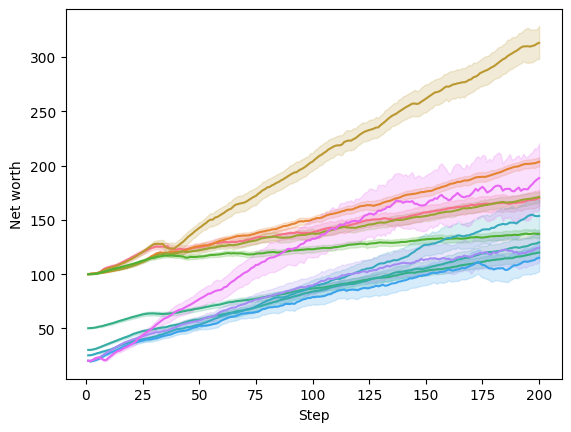

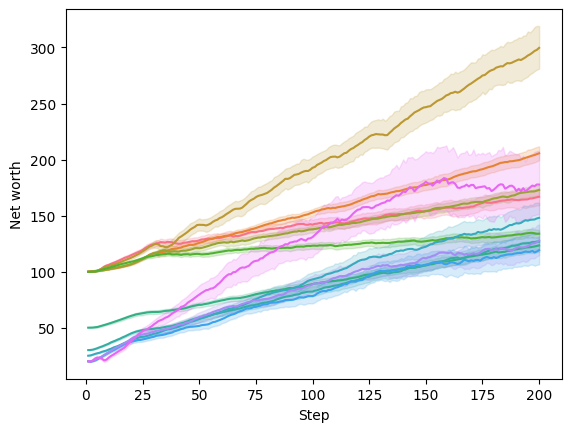

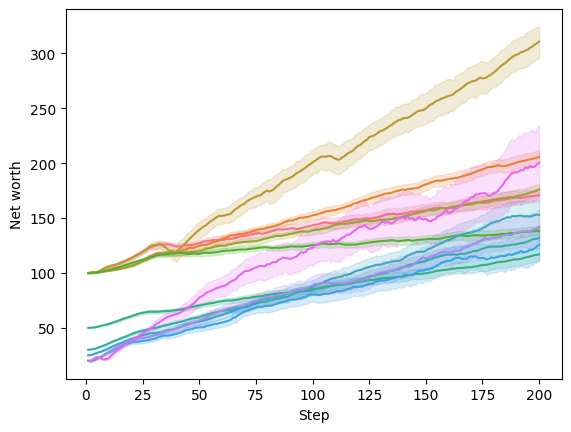

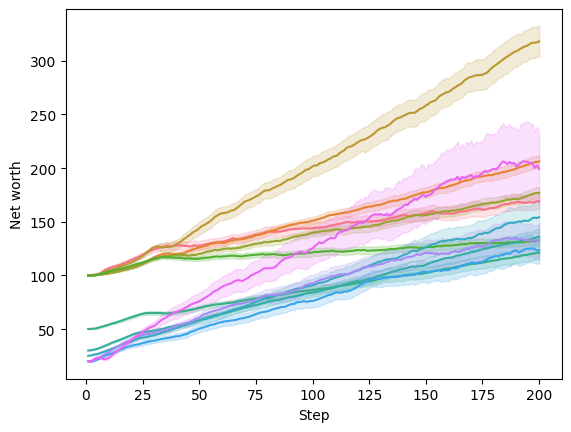

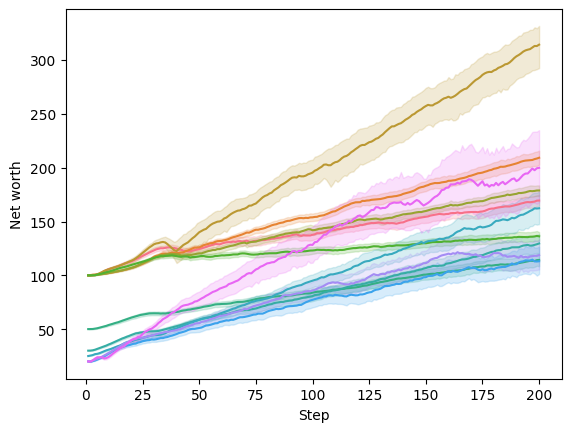

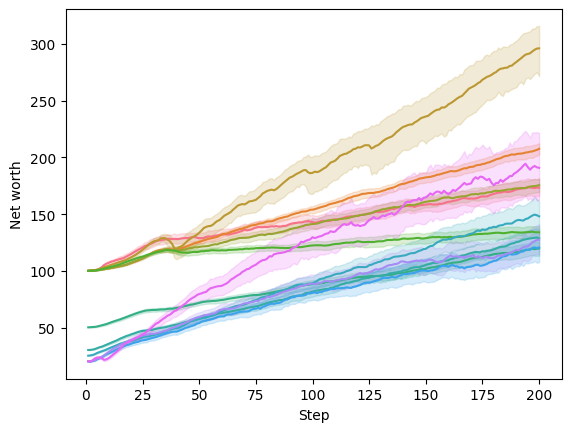

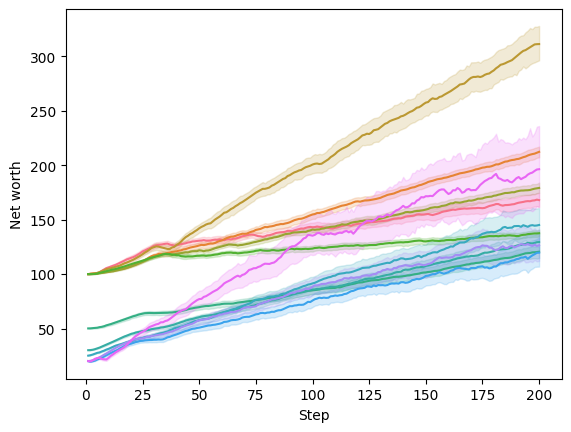

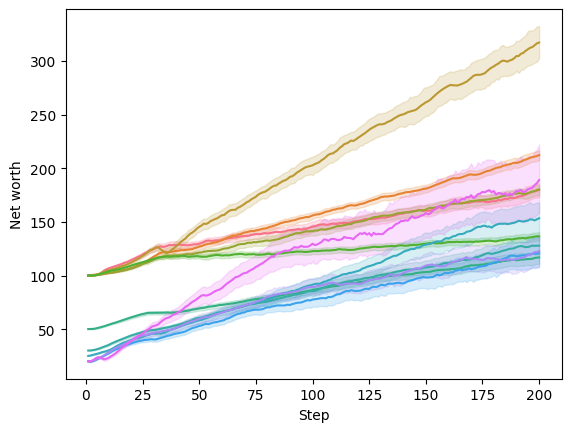

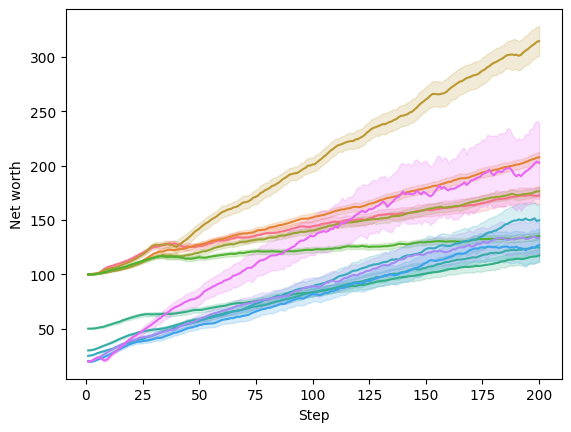

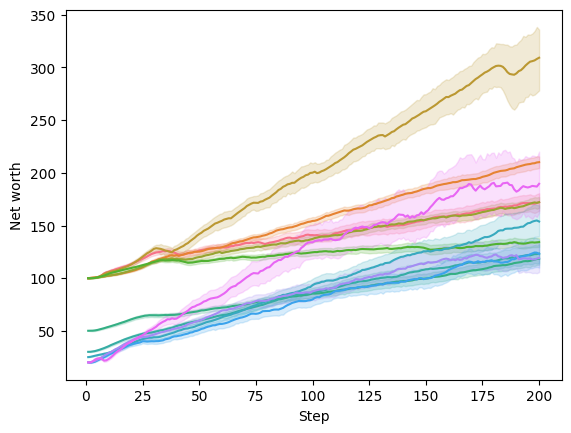

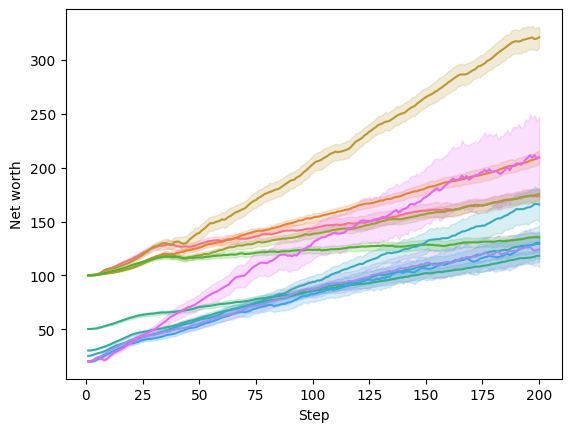

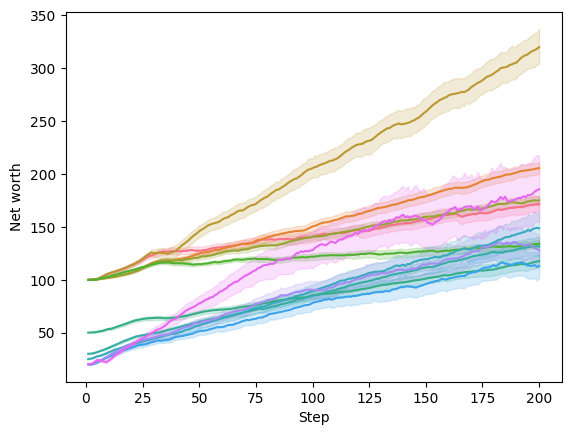

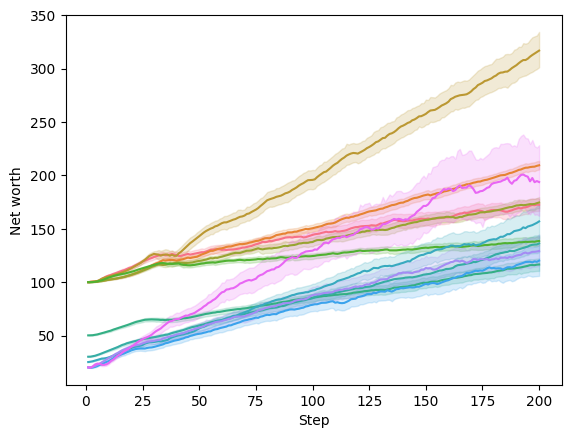

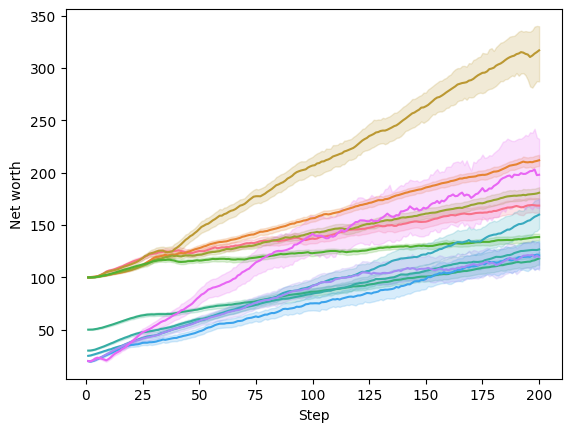

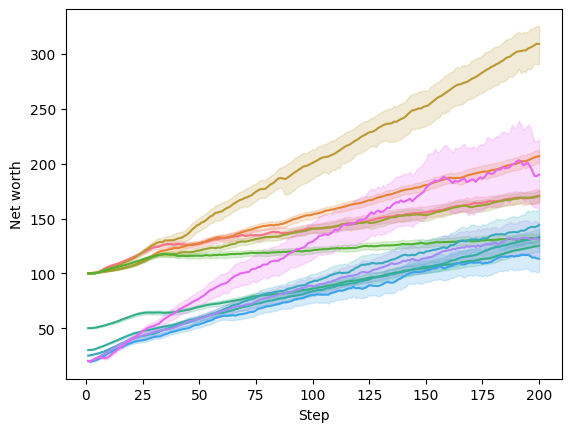

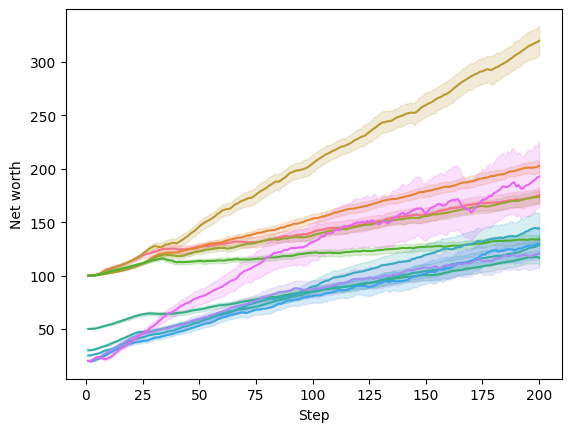

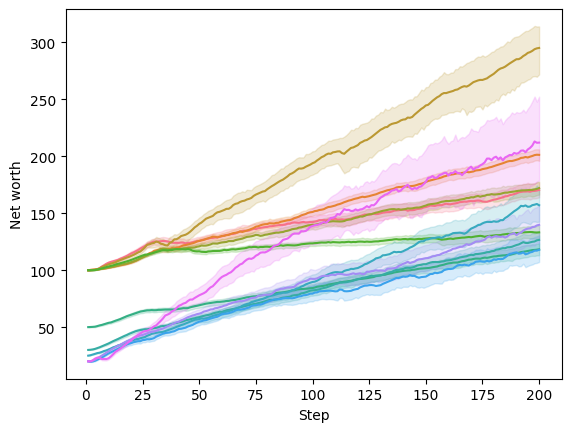

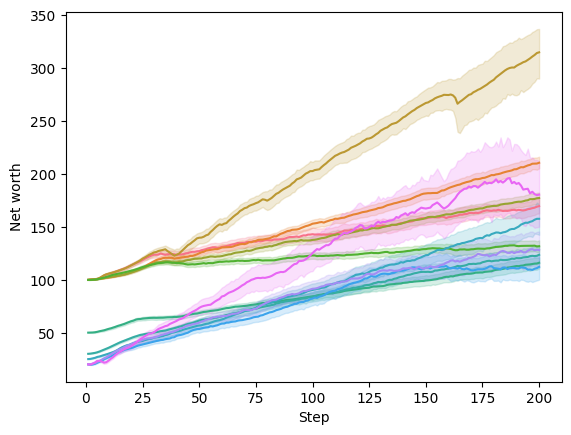

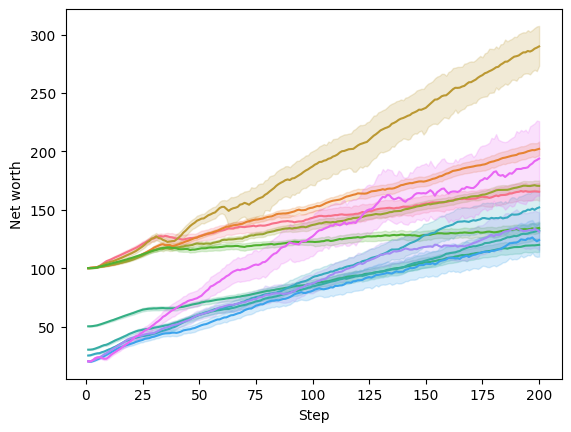

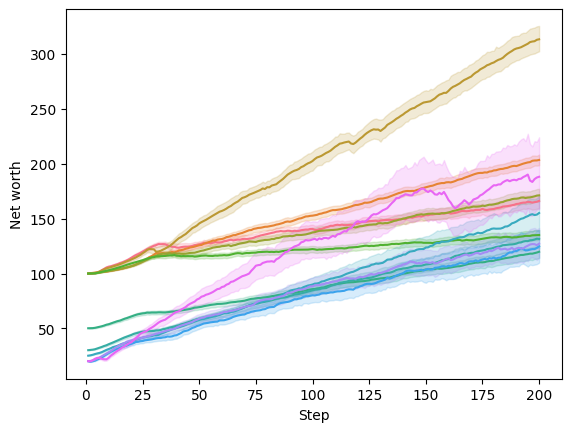

In [6]:
for df in agent_vars_df_list:

    sns.lineplot( data = df.loc[df["Type"] != "<class 'CRAB_agents.Household'>"], x = 'Step', y = 'Net worth', hue= 'Type', legend = False)#pl
    plt.show()

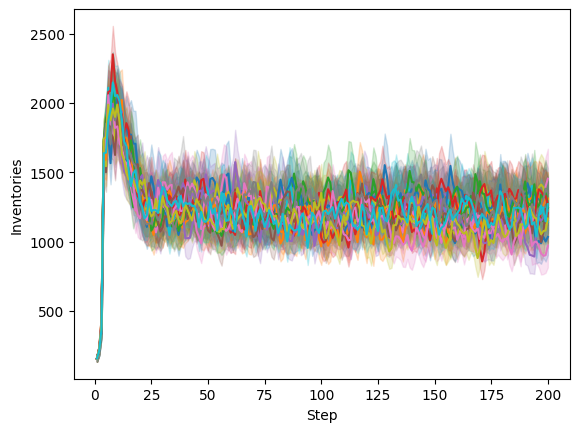

In [7]:

for df in agent_vars_df_list:
    sns.lineplot( data = df, x = 'Step', y = 'Inventories',  estimator='sum', legend = True)

plt.show()

#### N FIRMS

In [8]:
agent_vars_df_list[0]['Type'].unique()

array(["<class 'CRAB_agents.C26'>", "<class 'CRAB_agents.C27'>",
       "<class 'CRAB_agents.C28'>", "<class 'CRAB_agents.C29'>",
       "<class 'CRAB_agents.C30'>", "<class 'CRAB_agents.Industry'>",
       "<class 'CRAB_agents.Construction'>",
       "<class 'CRAB_agents.Transport'>",
       "<class 'CRAB_agents.Information'>",
       "<class 'CRAB_agents.Finance'>",
       "<class 'CRAB_agents.Business_services'>",
       "<class 'CRAB_agents.Household'>",
       "<class 'government.Government'>"], dtype=object)

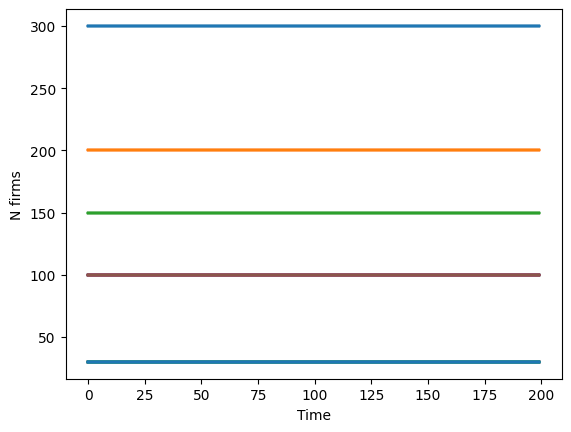

In [9]:
n_firms = ['n_ind_firms', 'n_cons_firms', 'n_trans_firms', 'n_inf_firms', 'n_fin_firms', 'n_rec_firms',
        'n_c26_firms', 'n_c27_firms', 'n_c28_firms', 'n_c29_firms', 'n_c30_firms']
colors = sns.palettes.color_palette("tab10", len(n_firms))

for i, var in enumerate(n_firms):
    plot_all_runs(model_vars_df_list, var, color=colors[i], legen=False)
# Plot number of firms per sector



plt.ylabel("N firms")
plt.show()

#### CONSUMPTION AND DEMAND

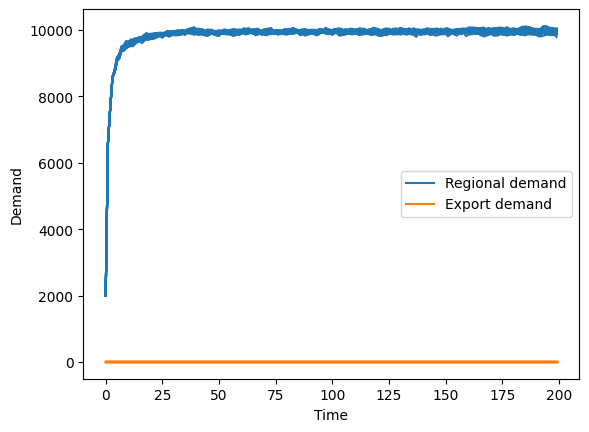

In [10]:
# Plot ratio regional:export demand
plot_all_runs(model_vars_df_list, "Regional demand", color="tab:blue")
plot_all_runs(model_vars_df_list, "Export demand", color="tab:orange")

plt.ylabel("Demand")
plt.show()

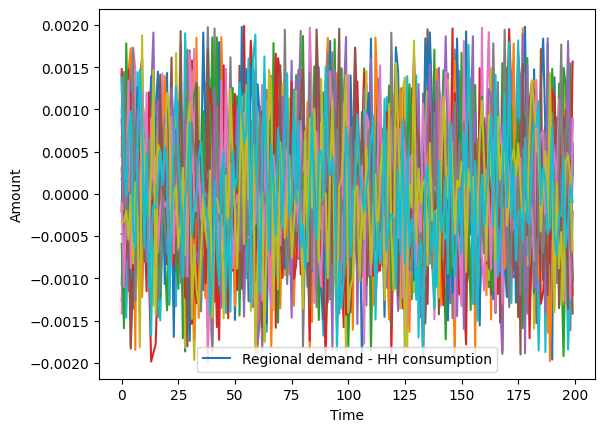

In [11]:
# Check HH consumption equals regional demand
plot_difference(model_vars_df_list, "Regional demand", "HH consumption")
plt.show()

#####  CAPITAL ORDERS

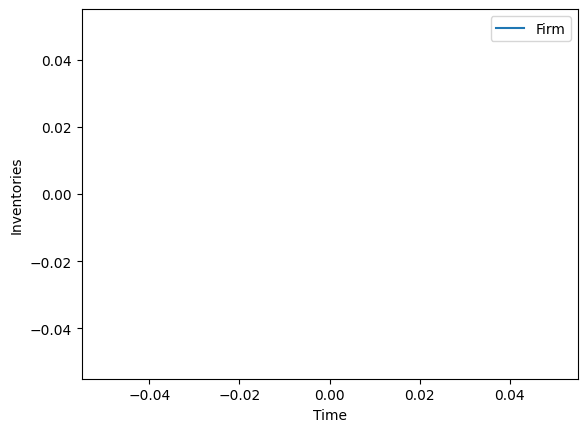

In [12]:
plot_total_per_type(agent_vars_df_list, 'Firm', "Inventories")
plt.show()

#### REAL DEMAND

In [13]:
agent_vars_df_list[0]

Step  AgentID                                     Type     Price  \
0           1        1                <class 'CRAB_agents.C26'>  1.228000   
1           1        2                <class 'CRAB_agents.C26'>  1.204000   
2           1        3                <class 'CRAB_agents.C26'>  1.200000   
3           1        4                <class 'CRAB_agents.C26'>  1.240000   
4           1        5                <class 'CRAB_agents.C26'>  1.199000   
...       ...      ...                                      ...       ...   
2220195   200    12442       <class 'CRAB_agents.Construction'>  1.218004   
2220196   200    12443          <class 'CRAB_agents.Transport'>  1.297733   
2220197   200    12444        <class 'CRAB_agents.Information'>  1.286406   
2220198   200    12445            <class 'CRAB_agents.Finance'>  1.297857   
2220199   200    12446  <class 'CRAB_agents.Business_services'>  1.260230   

         Market share   Prod  Inventories  N ordered  Production made  \
0            0.033333  1.035         1.03        0.0             1.03   
1            0.033333  1.063         1.06        0.0             1.06   
2            0.033333  1.073         1.07        0.0             1.07   
3            0.033333  1.042         1.04        0.0             1.04   
4            0.033333  1.062         1.06        0.0             1.06   
...               ...    ...          ...        ...              ...   
2220195      0.000000  1.031         0.00        0.0             1.00   
2220196      0.000000  1.091         0.00        0.0             1.00   
2220197      0.000000  1.091         0.00        0.0             1.00   
2220198      0.000000  1.034         0.00        0.0             1.00   
2220199      0.000000  1.091         0.00        0.0             1.00   

         Feasible production  Sum past demand  Past demand  Real demand  \
0                        1.0              3.0          1.0          0.0   
1                        1.0              3.0          1.0          0.0   
2                        1.0              3.0          1.0          0.0   
3                        1.0              3.0          1.0          0.0   
4                        1.0              3.0          1.0          0.0   
...                      ...              ...          ...          ...   
2220195                  NaN              2.0          1.0          1.0   
2220196                  NaN              2.0          1.0          1.0   
2220197                  NaN              2.0          1.0          1.0   
2220198                  NaN              2.0          1.0          1.0   
2220199                  NaN              2.0          1.0          1.0   

             Wage   Net worth  Debt  Size  Labor demand  Capital amount  
0        0.977933  100.000000   0.0   1.0           1.0            80.0  
1        0.984787  100.000000   0.0   1.0           1.0            80.0  
2        0.990209  100.000000   0.0   1.0           1.0            72.0  
3        0.994052  100.000000   0.0   1.0           1.0            80.0  
4        0.978951  100.000000   0.0   1.0           1.0            80.0  
...           ...         ...   ...   ...           ...             ...  
2220195  1.058000  112.017143   NaN   0.0           NaN             4.0  
2220196  1.032000   72.207591   NaN   0.0           NaN             7.0  
2220197  1.050000   85.800246   NaN   0.0           NaN             6.0  
2220198  1.094000  128.029191   NaN   0.0           NaN             4.0  
2220199  1.054000   35.220628   NaN   0.0           NaN             6.0  

[2220200 rows x 19 columns]

In [14]:
# unique types
agent_vars_df_list[0]["Type"].unique()

array(["<class 'CRAB_agents.C26'>", "<class 'CRAB_agents.C27'>",
       "<class 'CRAB_agents.C28'>", "<class 'CRAB_agents.C29'>",
       "<class 'CRAB_agents.C30'>", "<class 'CRAB_agents.Industry'>",
       "<class 'CRAB_agents.Construction'>",
       "<class 'CRAB_agents.Transport'>",
       "<class 'CRAB_agents.Information'>",
       "<class 'CRAB_agents.Finance'>",
       "<class 'CRAB_agents.Business_services'>",
       "<class 'CRAB_agents.Household'>",
       "<class 'government.Government'>"], dtype=object)

In [15]:
# group by type and step  and  sum market share
agent_vars_df_list[0].groupby(["Type"])["Market share"].sum()


Type
<class 'CRAB_agents.Business_services'>    199.998827
<class 'CRAB_agents.C26'>                  200.000000
<class 'CRAB_agents.C27'>                  200.000000
<class 'CRAB_agents.C28'>                  200.000000
<class 'CRAB_agents.C29'>                  200.000000
<class 'CRAB_agents.C30'>                  200.000000
<class 'CRAB_agents.Construction'>         199.994414
<class 'CRAB_agents.Finance'>              199.995004
<class 'CRAB_agents.Household'>              0.000000
<class 'CRAB_agents.Industry'>             199.994120
<class 'CRAB_agents.Information'>          199.995317
<class 'CRAB_agents.Transport'>            199.996914
<class 'government.Government'>              0.000000
Name: Market share, dtype: float64

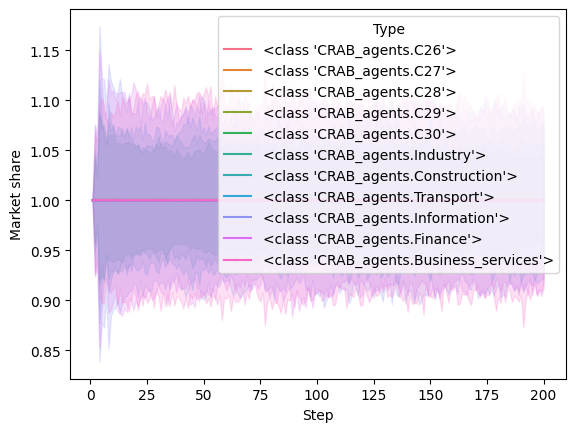

In [16]:

    # keep only Type !=      "<class 'CRAB_agents.Household'>", "<class 'government.Government'>"
agent_vars_df_list[0] = agent_vars_df_list[0][agent_vars_df_list[0]["Type"] != "<class 'CRAB_agents.Household'>"]
agent_vars_df_list[0] = agent_vars_df_list[0][agent_vars_df_list[0]["Type"] != "<class 'government.Government'>"]
sns.lineplot( data = agent_vars_df_list[0], x = 'Step', y = 'Market share', hue = 'Type', legend = True,  estimator=sum)
    # can you plot the hue name next to the line?
plt.show()

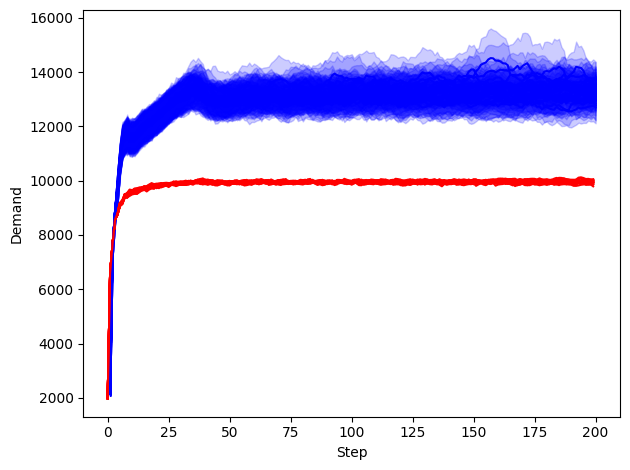

In [17]:
for i in range(len(agent_vars_df_list)):
    agent_vars_df_list[i]['Demand'] = agent_vars_df_list[i]['Price'] * agent_vars_df_list[i]['Real demand']
    sns.lineplot( data = agent_vars_df_list[i], x = 'Step', y = 'Demand', legend = False,  estimator=sum, color = 'blue')
    sns.lineplot( data = model_vars_df_list[i], x = model_vars_df_list[i].index, y = 'HH consumption', legend = False,  estimator=sum, color = 'red')
plt.tight_layout()
plt.show()

In [18]:
model_vars_df_list[i]

n_agents  n_households  n_c26_firms  n_c27_firms  n_c28_firms  \
0       11101         10000           30           30           30   
1       11101         10000           30           30           30   
2       11101         10000           30           30           30   
3       11101         10000           30           30           30   
4       11101         10000           30           30           30   
..        ...           ...          ...          ...          ...   
195     11101         10000           30           30           30   
196     11101         10000           30           30           30   
197     11101         10000           30           30           30   
198     11101         10000           30           30           30   
199     11101         10000           30           30           30   

     n_c29_firms  n_c30_firms  n_ind_firms  n_cons_firms  n_trans_firms  \
0             30           30          300           200            150   
1             30           30          300           200            150   
2             30           30          300           200            150   
3             30           30          300           200            150   
4             30           30          300           200            150   
..           ...          ...          ...           ...            ...   
195           30           30          300           200            150   
196           30           30          300           200            150   
197           30           30          300           200            150   
198           30           30          300           200            150   
199           30           30          300           200            150   

     n_inf_firms  n_fin_firms  n_rec_firms  HH consumption  Regional demand  \
0            100          100          100     1990.777626         1990.779   
1            100          100          100     6600.825626         6600.826   
2            100          100          100     7670.634035         7670.634   
3            100          100          100     8570.259299         8570.260   
4            100          100          100     8785.646024         8785.647   
..           ...          ...          ...             ...              ...   
195          100          100          100    10002.830575        10002.831   
196          100          100          100     9998.756625         9998.756   
197          100          100          100    10034.623329        10034.623   
198          100          100          100    10028.245900        10028.246   
199          100          100          100    10027.914099        10027.914   

     Export demand  Unemployment rate  Min wage  Avg wage  
0              0.0               0.89     0.100  1.000707  
1              0.0               0.86     0.600  1.036013  
2              0.0               0.65     0.624  1.038316  
3              0.0               0.44     0.624  1.042584  
4              0.0               0.39     0.624  1.039684  
..             ...                ...       ...       ...  
195            0.0               0.12     0.630  1.050203  
196            0.0               0.12     0.630  1.049693  
197            0.0               0.11     0.630  1.050140  
198            0.0               0.11     0.630  1.049753  
199            0.0               0.11     0.630  1.049952  

[200 rows x 19 columns]

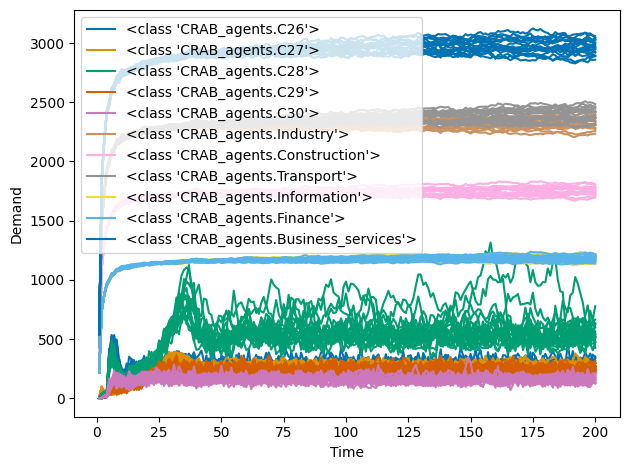

In [20]:
agent_types = agent_vars_df_list[0]["Type"].unique()
colors = sns.color_palette("colorblind", len(agent_types))
legend = True
# Plot average demand per sector
for i, agent_type in enumerate(agent_types):
    plot_total_per_type(agent_vars_df_list, agent_type, 'Demand', color=colors[i], legend=legend)
plt.tight_layout()
plt.show()

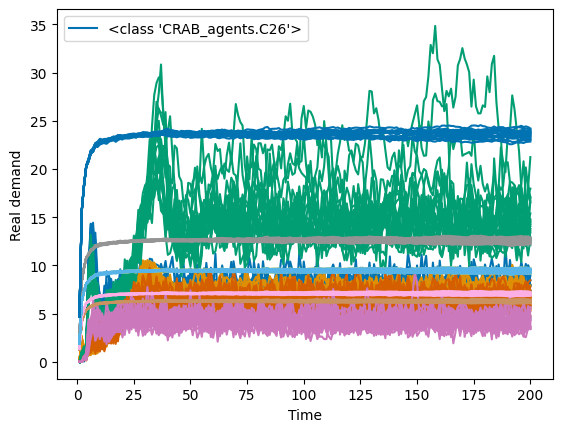

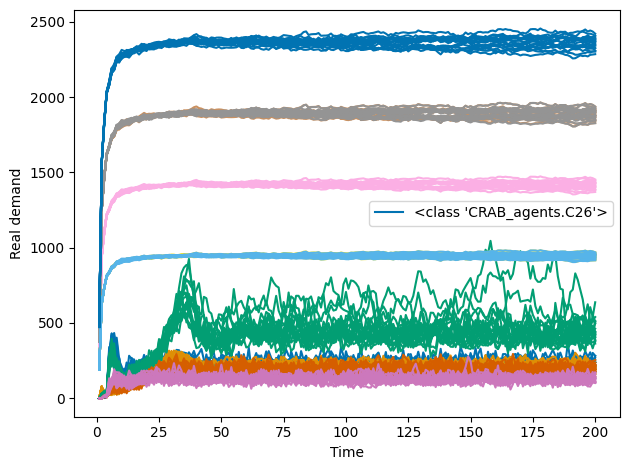

In [21]:
agent_types = agent_vars_df_list[0]["Type"].unique()
colors = sns.color_palette("colorblind", len(agent_types))
# Plot average demand per sector
for i, agent_type in enumerate(agent_types):
    legend = True if i == 0 else False
    plot_avg_per_type(agent_vars_df_list, agent_type, "Real demand", color=colors[i], legend=legend)

plt.tight_layout
plt.show()

for i, agent_type in enumerate(agent_types):
    legend = True if i == 0 else False
    plot_total_per_type(agent_vars_df_list, agent_type, "Real demand", color=colors[i], legend=legend)
plt.tight_layout()
plt.show()

#### LABOR

##### UNEMPLOYMENT RATE

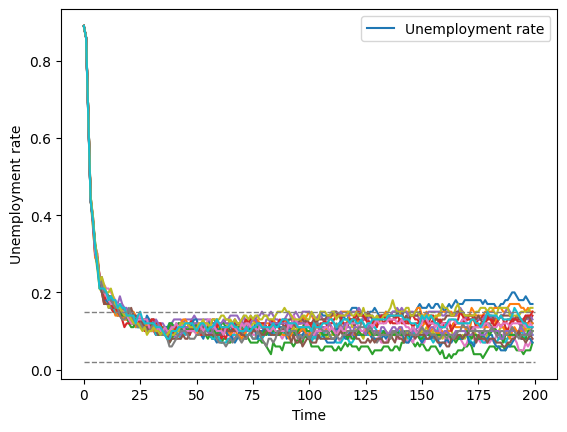

In [22]:
# Unemployment rate should vary between min 2-3 and max 10-15 percent
n_steps = len(model_vars_df_list[0])
plot_all_runs(model_vars_df_list, "Unemployment rate")
plt.hlines(y=0.02, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.hlines(y=0.15, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.show()

##### LABOR DEMAND

<Axes: xlabel='Step', ylabel='Labor demand'>

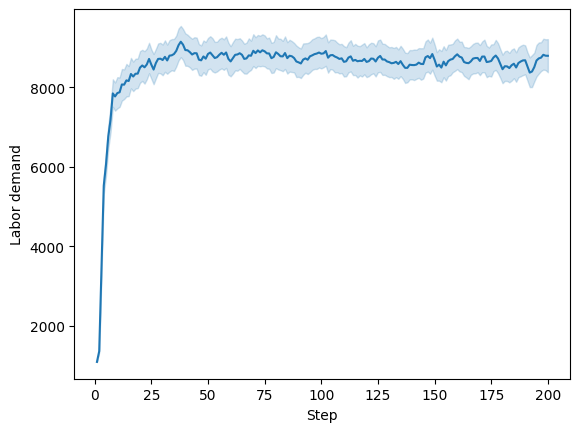

In [23]:
sns.lineplot(data = agent_vars_df_list[0], x = 'Step', y = 'Labor demand', legend = False,  estimator=sum)

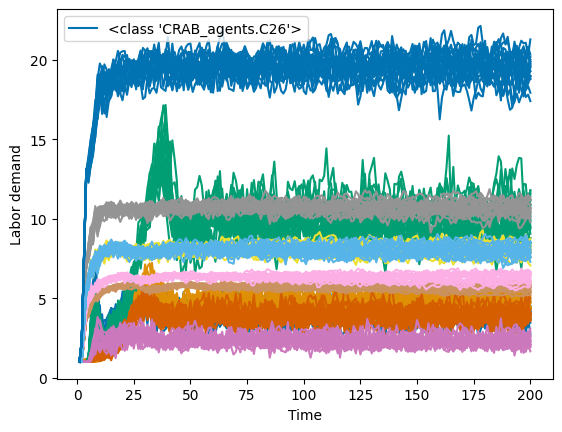

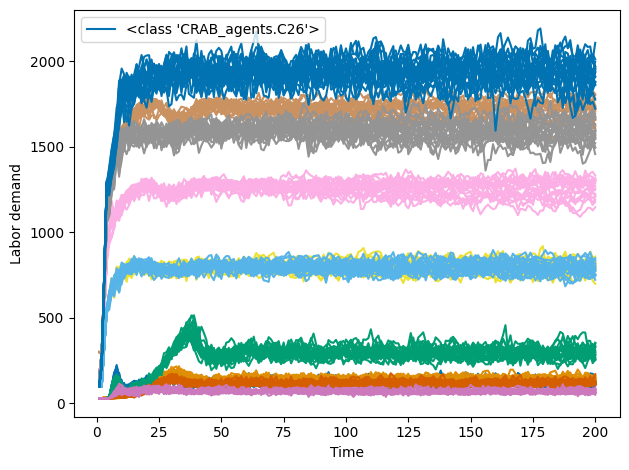

In [24]:
# Plot average labor demand per sector
for i, agent_type in enumerate(agent_types):
    legend = True if i == 0 else False
    plot_avg_per_type(agent_vars_df_list, agent_type, "Labor demand", color=colors[i], legend=legend)

plt.tight_layout
plt.show()

# Plot total labor demand per sector
for i, agent_type in enumerate(agent_types):
    legend = True if i == 0 else False
    plot_total_per_type(agent_vars_df_list, agent_type, "Labor demand", color=colors[i], legend=legend)
plt.tight_layout()
plt.show()

##### Additional labor demand

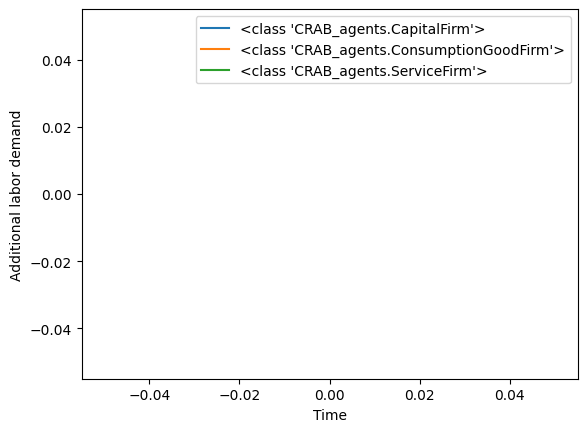

In [25]:
# Plot average labor demand per sector
for df in agent_vars_df_list:
    df["Additional labor demand"] = df["Size"] - df["Labor demand"]
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Additional labor demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Additional labor demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Additional labor demand", color="tab:green")
plt.show()

##### SIZE

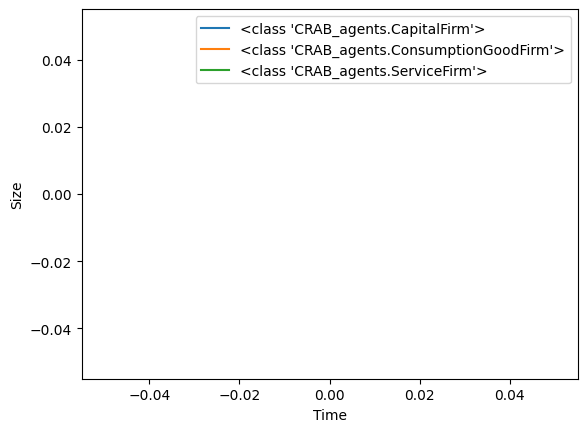

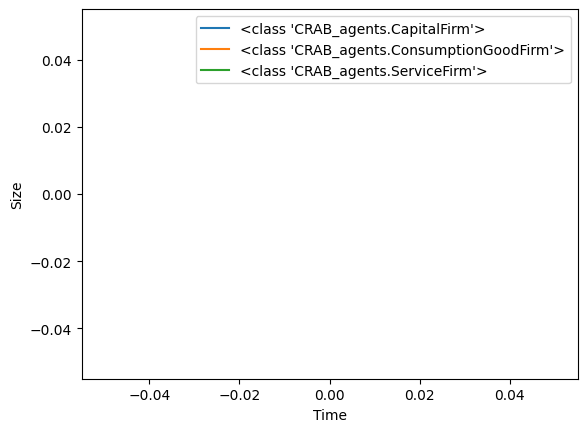

In [26]:
# Plot size (n employers) for all firms (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

# Plot size (n employers) for all firms (total)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

In [27]:
agent_vars_df_list[0]

Step  AgentID                                     Type     Price  \
0           1        1                <class 'CRAB_agents.C26'>  1.228000   
1           1        2                <class 'CRAB_agents.C26'>  1.204000   
2           1        3                <class 'CRAB_agents.C26'>  1.200000   
3           1        4                <class 'CRAB_agents.C26'>  1.240000   
4           1        5                <class 'CRAB_agents.C26'>  1.199000   
...       ...      ...                                      ...       ...   
2220195   200    12442       <class 'CRAB_agents.Construction'>  1.218004   
2220196   200    12443          <class 'CRAB_agents.Transport'>  1.297733   
2220197   200    12444        <class 'CRAB_agents.Information'>  1.286406   
2220198   200    12445            <class 'CRAB_agents.Finance'>  1.297857   
2220199   200    12446  <class 'CRAB_agents.Business_services'>  1.260230   

         Market share   Prod  Inventories  N ordered  Production made  \
0            0.033333  1.035         1.03        0.0             1.03   
1            0.033333  1.063         1.06        0.0             1.06   
2            0.033333  1.073         1.07        0.0             1.07   
3            0.033333  1.042         1.04        0.0             1.04   
4            0.033333  1.062         1.06        0.0             1.06   
...               ...    ...          ...        ...              ...   
2220195      0.000000  1.031         0.00        0.0             1.00   
2220196      0.000000  1.091         0.00        0.0             1.00   
2220197      0.000000  1.091         0.00        0.0             1.00   
2220198      0.000000  1.034         0.00        0.0             1.00   
2220199      0.000000  1.091         0.00        0.0             1.00   

         Feasible production  ...  Past demand  Real demand      Wage  \
0                        1.0  ...          1.0          0.0  0.977933   
1                        1.0  ...          1.0          0.0  0.984787   
2                        1.0  ...          1.0          0.0  0.990209   
3                        1.0  ...          1.0          0.0  0.994052   
4                        1.0  ...          1.0          0.0  0.978951   
...                      ...  ...          ...          ...       ...   
2220195                  NaN  ...          1.0          1.0  1.058000   
2220196                  NaN  ...          1.0          1.0  1.032000   
2220197                  NaN  ...          1.0          1.0  1.050000   
2220198                  NaN  ...          1.0          1.0  1.094000   
2220199                  NaN  ...          1.0          1.0  1.054000   

          Net worth  Debt  Size  Labor demand  Capital amount    Demand  \
0        100.000000   0.0   1.0           1.0            80.0  0.000000   
1        100.000000   0.0   1.0           1.0            80.0  0.000000   
2        100.000000   0.0   1.0           1.0            72.0  0.000000   
3        100.000000   0.0   1.0           1.0            80.0  0.000000   
4        100.000000   0.0   1.0           1.0            80.0  0.000000   
...             ...   ...   ...           ...             ...       ...   
2220195  112.017143   NaN   0.0           NaN             4.0  1.218004   
2220196   72.207591   NaN   0.0           NaN             7.0  1.297733   
2220197   85.800246   NaN   0.0           NaN             6.0  1.286406   
2220198  128.029191   NaN   0.0           NaN             4.0  1.297857   
2220199   35.220628   NaN   0.0           NaN             6.0  1.260230   

         Additional labor demand  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
2220195                      NaN  
2220196                      NaN  
2220197                      NaN  
2220198                      NaN  
2220199                      NaN  

[220000 

In [28]:
import seaborn as sns

In [29]:
df = agent_vars_df_list[0]

In [30]:
df

Step  AgentID                                     Type     Price  \
0           1        1                <class 'CRAB_agents.C26'>  1.228000   
1           1        2                <class 'CRAB_agents.C26'>  1.204000   
2           1        3                <class 'CRAB_agents.C26'>  1.200000   
3           1        4                <class 'CRAB_agents.C26'>  1.240000   
4           1        5                <class 'CRAB_agents.C26'>  1.199000   
...       ...      ...                                      ...       ...   
2220195   200    12442       <class 'CRAB_agents.Construction'>  1.218004   
2220196   200    12443          <class 'CRAB_agents.Transport'>  1.297733   
2220197   200    12444        <class 'CRAB_agents.Information'>  1.286406   
2220198   200    12445            <class 'CRAB_agents.Finance'>  1.297857   
2220199   200    12446  <class 'CRAB_agents.Business_services'>  1.260230   

         Market share   Prod  Inventories  N ordered  Production made  \
0            0.033333  1.035         1.03        0.0             1.03   
1            0.033333  1.063         1.06        0.0             1.06   
2            0.033333  1.073         1.07        0.0             1.07   
3            0.033333  1.042         1.04        0.0             1.04   
4            0.033333  1.062         1.06        0.0             1.06   
...               ...    ...          ...        ...              ...   
2220195      0.000000  1.031         0.00        0.0             1.00   
2220196      0.000000  1.091         0.00        0.0             1.00   
2220197      0.000000  1.091         0.00        0.0             1.00   
2220198      0.000000  1.034         0.00        0.0             1.00   
2220199      0.000000  1.091         0.00        0.0             1.00   

         Feasible production  ...  Past demand  Real demand      Wage  \
0                        1.0  ...          1.0          0.0  0.977933   
1                        1.0  ...          1.0          0.0  0.984787   
2                        1.0  ...          1.0          0.0  0.990209   
3                        1.0  ...          1.0          0.0  0.994052   
4                        1.0  ...          1.0          0.0  0.978951   
...                      ...  ...          ...          ...       ...   
2220195                  NaN  ...          1.0          1.0  1.058000   
2220196                  NaN  ...          1.0          1.0  1.032000   
2220197                  NaN  ...          1.0          1.0  1.050000   
2220198                  NaN  ...          1.0          1.0  1.094000   
2220199                  NaN  ...          1.0          1.0  1.054000   

          Net worth  Debt  Size  Labor demand  Capital amount    Demand  \
0        100.000000   0.0   1.0           1.0            80.0  0.000000   
1        100.000000   0.0   1.0           1.0            80.0  0.000000   
2        100.000000   0.0   1.0           1.0            72.0  0.000000   
3        100.000000   0.0   1.0           1.0            80.0  0.000000   
4        100.000000   0.0   1.0           1.0            80.0  0.000000   
...             ...   ...   ...           ...             ...       ...   
2220195  112.017143   NaN   0.0           NaN             4.0  1.218004   
2220196   72.207591   NaN   0.0           NaN             7.0  1.297733   
2220197   85.800246   NaN   0.0           NaN             6.0  1.286406   
2220198  128.029191   NaN   0.0           NaN             4.0  1.297857   
2220199   35.220628   NaN   0.0           NaN             6.0  1.260230   

         Additional labor demand  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
2220195                      NaN  
2220196                      NaN  
2220197                      NaN  
2220198                      NaN  
2220199                      NaN  

[220000 

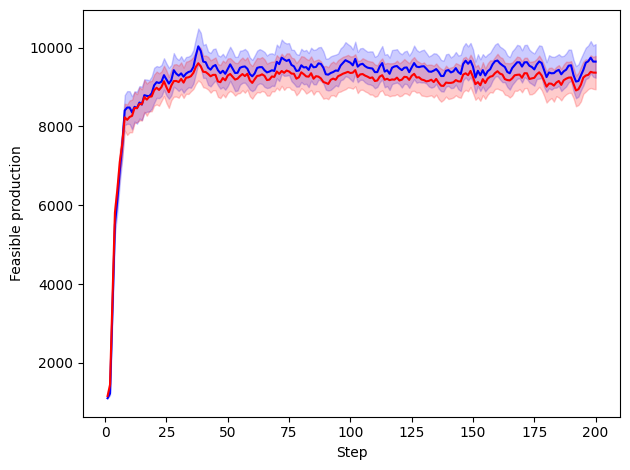

In [31]:
sns.lineplot( data=df, x='Step', y="Feasible production", color = 'blue', estimator=sum)
sns.lineplot( data=df, x='Step', y="Production made", color = 'red', estimator=sum)
plt.tight_layout()
plt.show()

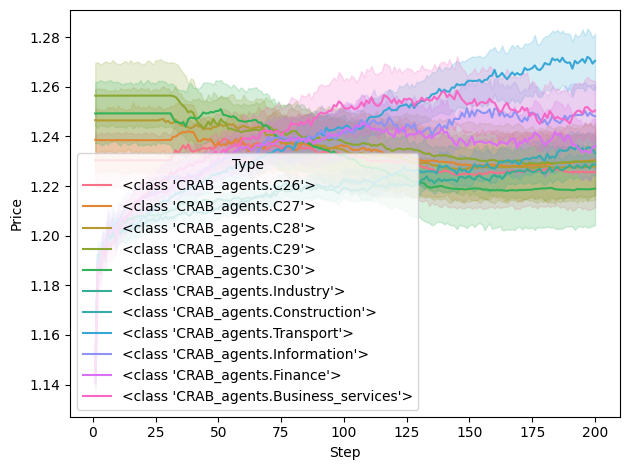

In [32]:


df = agent_vars_df_list[0]
sns.lineplot( data=df, x='Step', y="Price", hue="Type")

plt.tight_layout()
plt.show()

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_57499/2324774661.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


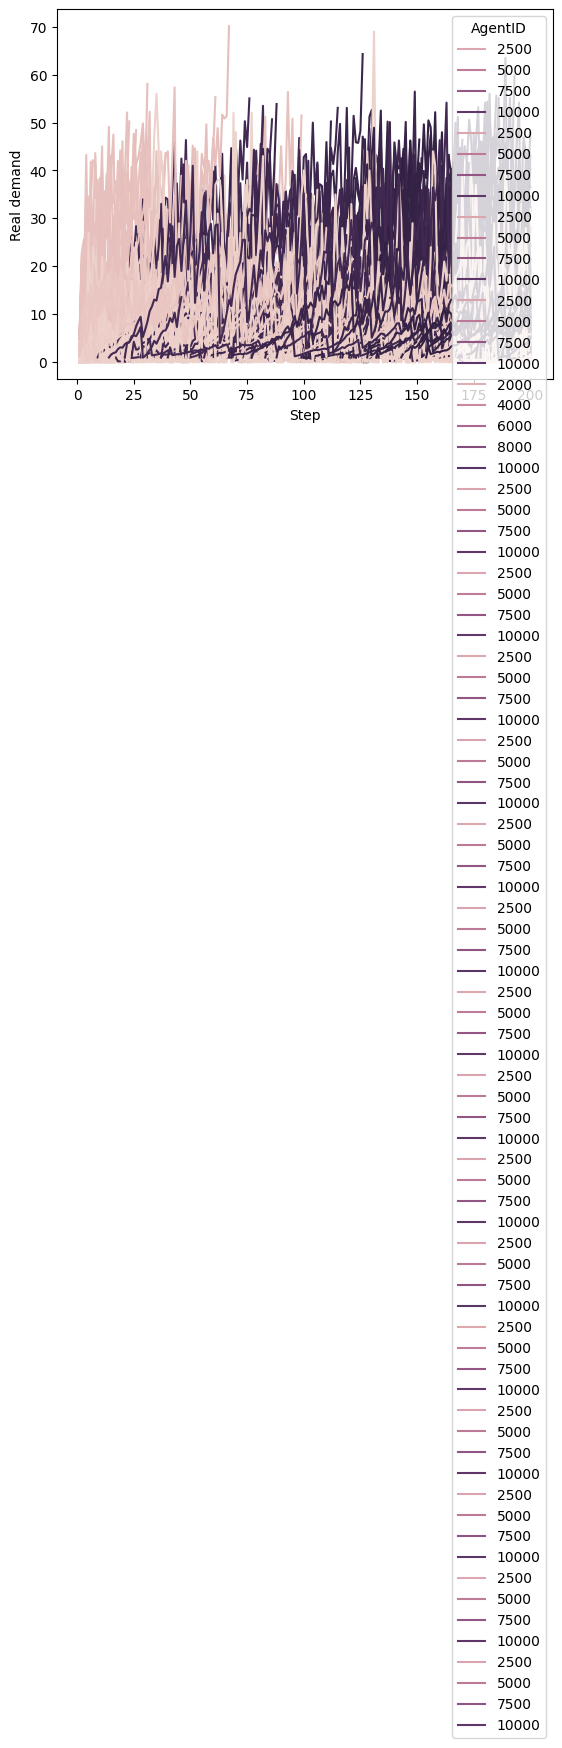

In [33]:
for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]
    # keep  type != <class 'CRAB_agents.Household'>
    df = df[df["Type"] != "<class 'CRAB_agents.Household'>"]
    # sample 100 rows
    id_list = df["AgentID"].unique()
    # sample 20 id
    id_list = np.random.choice(id_list, 20)
    # keep only the sampled is 
    df_sample = df[df["AgentID"].isin(id_list)]

    sns.lineplot( data=df_sample, x='Step', y="Real demand", hue="AgentID")

plt.tight_layout()
plt.show()


In [34]:
df_sample

Step  AgentID                                     Type     Price  \
13          1       14                <class 'CRAB_agents.C26'>  1.259000   
86          1       87                <class 'CRAB_agents.C28'>  1.297000   
223         1      224           <class 'CRAB_agents.Industry'>  1.149280   
328         1      329           <class 'CRAB_agents.Industry'>  1.171374   
458         1      459       <class 'CRAB_agents.Construction'>  1.117202   
...       ...      ...                                      ...       ...   
2219820   200    11952       <class 'CRAB_agents.Construction'>  1.233179   
2219832   200    11976       <class 'CRAB_agents.Construction'>  1.179783   
2219907   200    12080          <class 'CRAB_agents.Transport'>  1.187630   
2220048   200    12273  <class 'CRAB_agents.Business_services'>  1.227472   
2220118   200    12348  <class 'CRAB_agents.Business_services'>  1.265074   

         Market share   Prod  Inventories  N ordered  Production made  \
13           0.033333  1.043        1.040        0.0            1.040   
86           0.033333  0.999        1.000        0.0            1.000   
223          0.003346  1.041        0.000        0.0            1.041   
328          0.003379  1.048        0.000        0.0            1.048   
458          0.004944  1.058        0.000        0.0            1.058   
...               ...    ...          ...        ...              ...   
2219820      0.006667  1.071        0.000        0.0            8.568   
2219832      0.003560  1.046        0.000        0.0            4.184   
2219907      0.005048  1.065        5.890        1.0            6.390   
2220048      0.003188  1.074       26.967        3.0           34.368   
2220118      0.006917  1.051        0.000        4.0           11.561   

         Feasible production  ...  Past demand  Real demand      Wage  \
13                       1.0  ...        1.000        0.000  1.010543   
86                       1.0  ...        1.000        0.000  0.997055   
223                      1.0  ...        1.000        1.278  0.997000   
328                      1.0  ...        1.000        1.283  1.023000   
458                      1.0  ...        1.000        1.394  0.985000   
...                      ...  ...          ...          ...       ...   
2219820                  9.0  ...        7.886        9.311  1.073000   
2219832                  4.0  ...        4.336        5.092  1.001000   
2219907                  6.0  ...        7.126        9.454  1.033000   
2220048                 34.0  ...       34.892        7.401  1.076000   
2220118                 12.0  ...       15.098       16.409  1.090000   

          Net worth  Debt  Size  Labor demand  Capital amount     Demand  \
13       100.000000   0.0   1.0           1.0            80.0   0.000000   
86       100.000000   0.0   1.0           1.0            80.0   0.000000   
223       50.159200   0.0   1.0           1.0            28.0   1.468779   
328       50.164000   0.0   1.0           1.0            30.0   1.502873   
458       30.157600   0.0   1.0           1.0            20.0   1.557380   
...             ...   ...   ...           ...             ...        ...   
2219820   76.332408   0.0   8.0           8.0            10.0  11.482126   
2219832   80.022859   0.0   4.0           4.0             7.0   6.007454   
2219907   82.768043   0.0   6.0           6.0            24.0  11.227853   
2220048   38.954636   0.0  32.0          32.0            41.0   9.084517   
2220118   37.434762   0.0  11.0          11.0            14.0  20.758601   

         Additional labor demand  
13                           0.0  
86                           0.0  
223                          0.0  
328                          0.0  
458                          0.0  
...                          ...  
2219820                      0.0  
2219832                      0.0  
2219907                      0.0  
2220048                      0.0  
2220118                      0.0

In [35]:
agent_vars_df_list[0]

Step  AgentID                                     Type     Price  \
0           1        1                <class 'CRAB_agents.C26'>  1.228000   
1           1        2                <class 'CRAB_agents.C26'>  1.204000   
2           1        3                <class 'CRAB_agents.C26'>  1.200000   
3           1        4                <class 'CRAB_agents.C26'>  1.240000   
4           1        5                <class 'CRAB_agents.C26'>  1.199000   
...       ...      ...                                      ...       ...   
2220195   200    12442       <class 'CRAB_agents.Construction'>  1.218004   
2220196   200    12443          <class 'CRAB_agents.Transport'>  1.297733   
2220197   200    12444        <class 'CRAB_agents.Information'>  1.286406   
2220198   200    12445            <class 'CRAB_agents.Finance'>  1.297857   
2220199   200    12446  <class 'CRAB_agents.Business_services'>  1.260230   

         Market share   Prod  Inventories  N ordered  Production made  \
0            0.033333  1.035         1.03        0.0             1.03   
1            0.033333  1.063         1.06        0.0             1.06   
2            0.033333  1.073         1.07        0.0             1.07   
3            0.033333  1.042         1.04        0.0             1.04   
4            0.033333  1.062         1.06        0.0             1.06   
...               ...    ...          ...        ...              ...   
2220195      0.000000  1.031         0.00        0.0             1.00   
2220196      0.000000  1.091         0.00        0.0             1.00   
2220197      0.000000  1.091         0.00        0.0             1.00   
2220198      0.000000  1.034         0.00        0.0             1.00   
2220199      0.000000  1.091         0.00        0.0             1.00   

         Feasible production  ...  Past demand  Real demand      Wage  \
0                        1.0  ...          1.0          0.0  0.977933   
1                        1.0  ...          1.0          0.0  0.984787   
2                        1.0  ...          1.0          0.0  0.990209   
3                        1.0  ...          1.0          0.0  0.994052   
4                        1.0  ...          1.0          0.0  0.978951   
...                      ...  ...          ...          ...       ...   
2220195                  NaN  ...          1.0          1.0  1.058000   
2220196                  NaN  ...          1.0          1.0  1.032000   
2220197                  NaN  ...          1.0          1.0  1.050000   
2220198                  NaN  ...          1.0          1.0  1.094000   
2220199                  NaN  ...          1.0          1.0  1.054000   

          Net worth  Debt  Size  Labor demand  Capital amount    Demand  \
0        100.000000   0.0   1.0           1.0            80.0  0.000000   
1        100.000000   0.0   1.0           1.0            80.0  0.000000   
2        100.000000   0.0   1.0           1.0            72.0  0.000000   
3        100.000000   0.0   1.0           1.0            80.0  0.000000   
4        100.000000   0.0   1.0           1.0            80.0  0.000000   
...             ...   ...   ...           ...             ...       ...   
2220195  112.017143   NaN   0.0           NaN             4.0  1.218004   
2220196   72.207591   NaN   0.0           NaN             7.0  1.297733   
2220197   85.800246   NaN   0.0           NaN             6.0  1.286406   
2220198  128.029191   NaN   0.0           NaN             4.0  1.297857   
2220199   35.220628   NaN   0.0           NaN             6.0  1.260230   

         Additional labor demand  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  
...                          ...  
2220195                      NaN  
2220196                      NaN  
2220197                      NaN  
2220198                      NaN  
2220199                      NaN  

[220000 

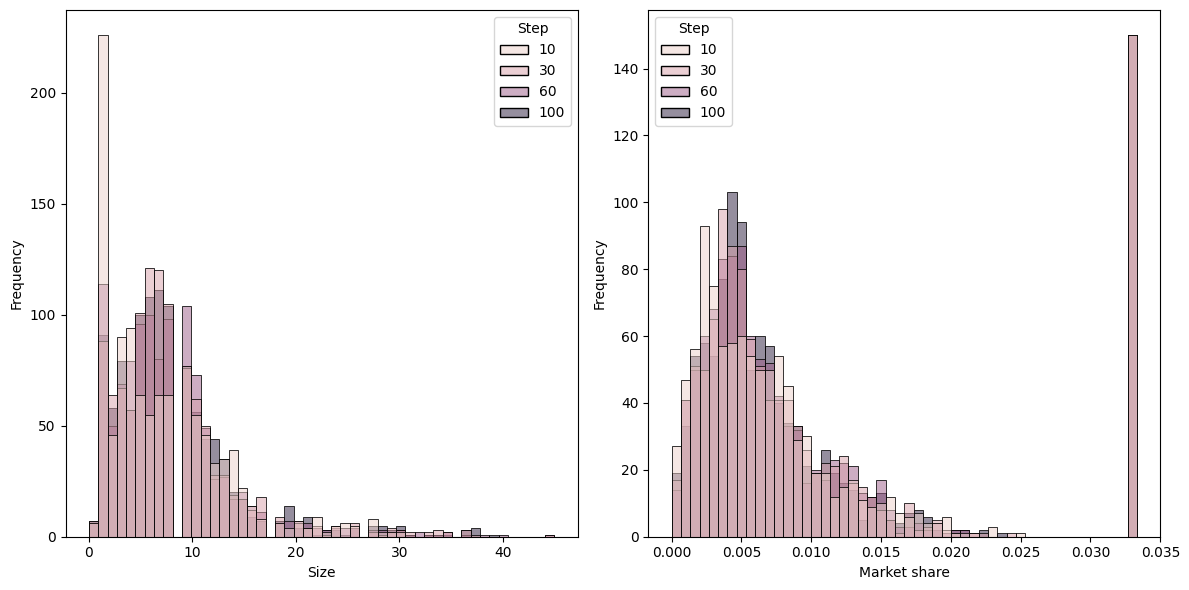

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [36]:
import seaborn as sns
steps_to_check = [10, 30, 60, 100]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]

    # keep only firms at the specified steps
    df_step = df[df["Step"].isin(steps_to_check)]

    # Plot histogram of the size of firms
    sns.histplot(data=df_step, x="Size", hue="Step", bins=50, alpha=0.5, ax=axs[0], legend=True)

    axs[0].set_xlabel("Size")
    axs[0].set_ylabel("Frequency")


    # Plot histogram of market share
    sns.histplot(data=df_step, x="Market share", hue="Step", bins=50, alpha=0.5, ax=axs[1], legend=True)

    axs[1].set_xlabel("Market share")
    axs[1].set_ylabel("Frequency")


    plt.tight_layout()
    plt.show()


In [37]:
# Plot distribution of firms sizes at end of simulation
for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]
    df = df[(df["Type"] == "<class 'CRAB_agents.CapitalFirm'>")
            | (df["Type"] == "<class 'CRAB_agents.ConsumptionGoodFirm'>")
            | (df["Type"] == "<class 'CRAB_agents.ServiceFirm'>")
           ]
    df[df["Step"] == max(df["Step"])].hist("Size", by="Type", bins=50)
    plt.tight_layout()
    plt.show()

ValueError: max() iterable argument is empty

#### MIN and AVERAGE WAGE

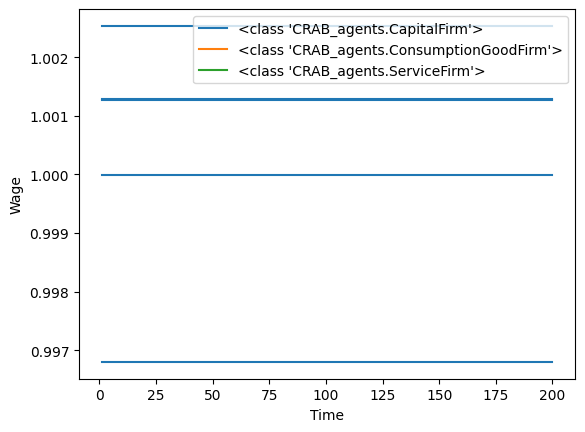

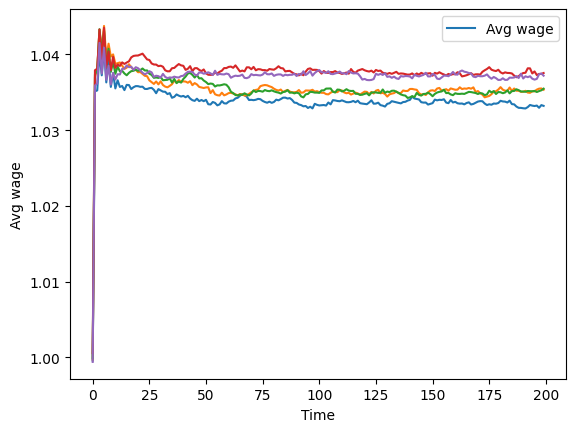

n_agents  n_households  n_cap_firms  n_agr_firms  n_ind_firms  \
0       11276         10000          125          200          300   
1       11276         10000          125          200          300   
2       11276         10000          125          200          300   
3       11276         10000          125          200          300   
4       11276         10000          125          200          300   
..        ...           ...          ...          ...          ...   
195     11276         10000          125          200          300   
196     11276         10000          125          200          300   
197     11276         10000          125          200          300   
198     11276         10000          125          200          300   
199     11276         10000          125          200          300   

     n_cons_firms  n_trans_firms  n_inf_firms  n_fin_firms  n_rec_firms  \
0             200            150          100          100          100   
1             200            150          100          100          100   
2             200            150          100          100          100   
3             200            150          100          100          100   
4             200            150          100          100          100   
..            ...            ...          ...          ...          ...   
195           200            150          100          100          100   
196           200            150          100          100          100   
197           200            150          100          100          100   
198           200            150          100          100          100   
199           200            150          100          100          100   

     HH consumption  Regional demand  Export demand  Unemployment rate  \
0       2146.966554         2146.967            0.0               0.87   
1       6655.304554         6655.304            0.0               0.85   
2       7722.129554         7722.129            0.0               0.64   
3       8640.958554         8640.960            0.0               0.42   
4       9057.064085         9057.064            0.0               0.32   
..              ...              ...            ...                ...   
195     9978.126947         9978.127            0.0               0.09   
196     9957.915181         9957.916            0.0               0.09   
197     9939.490066         9939.491            0.0               0.09   
198     9939.776152         9939.776            0.0               0.09   
199     9952.559639         9952.560            0.0               0.09   

     Min wage  Avg wage  
0       0.100  0.999582  
1       0.600  1.035129  
2       0.624  1.035246  
3       0.624  1.040255  
4       0.624  1.037241  
..        ...       ...  
195     0.618  1.033187  
196     0.618  1.033247  
197     0.618  1.032955  
198     0.618  1.033307  
199     0.618  1.033206  

[200 rows x 16 columns]

In [ ]:
# Plot average wage
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

plot_all_runs(model_vars_df_list, "Avg wage")
plt.show()

model_vars_df_list[0]

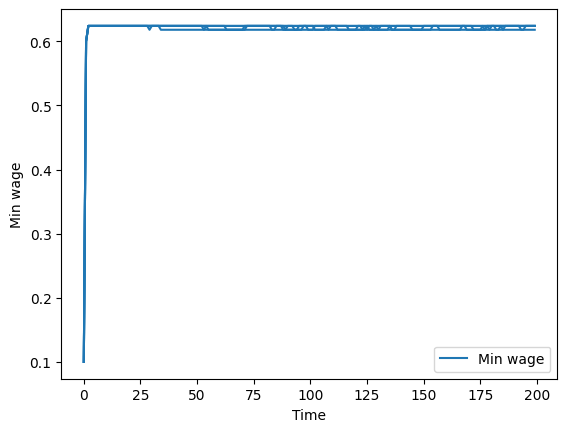

In [ ]:
# Plot minimum wage
plot_all_runs(model_vars_df_list, "Min wage", color="tab:blue")
plt.show()

#### PRICES

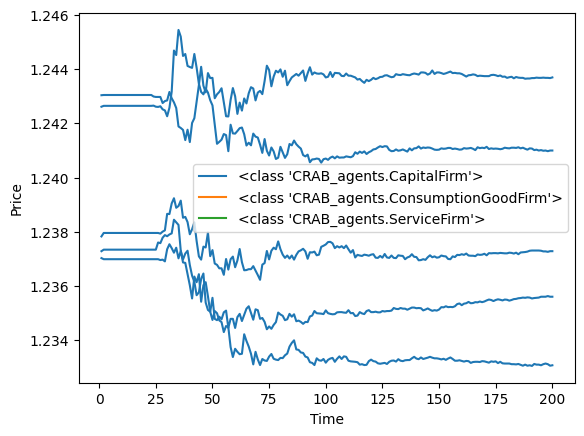

In [ ]:
# Plot average prices per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Price", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Price", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Price", color="tab:green")
plt.show()

#### MARKET SHARES

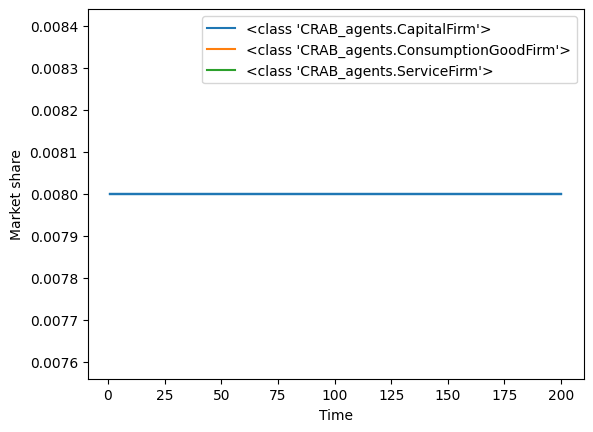

In [ ]:
# Plot average market share per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Market share", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Market share", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Market share", color="tab:green")
plt.show()

#### NET WORTH

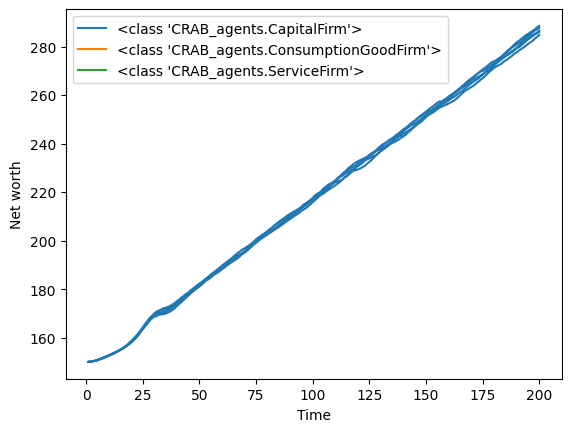

In [ ]:
# Plot average net worth per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Net worth", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Net worth", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Net worth", color="tab:green")
plt.show()

#### PRODUCTIVITY and WAGES

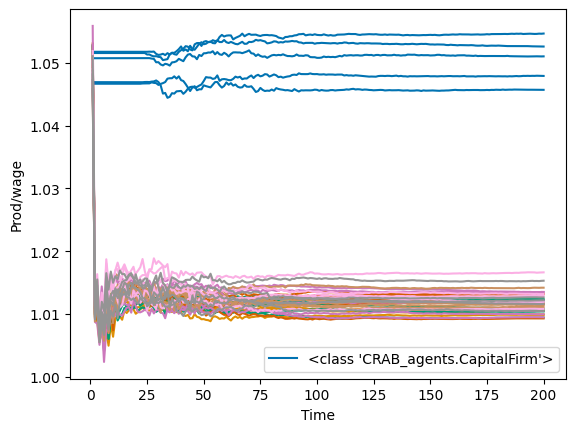

In [ ]:
# Plot average ratio productivity : wage per sector
for df in agent_vars_df_list:
    df["Prod/wage"] = df["Prod"]/df["Wage"]
    # Plot average labor demand per sector
for i, agent_type in enumerate(agent_types):
    legend = True if i == 0 else False
    plot_avg_per_type(agent_vars_df_list, agent_type, "Prod/wage", color=colors[i], legend=legend)

plt.tight_layout
plt.show()



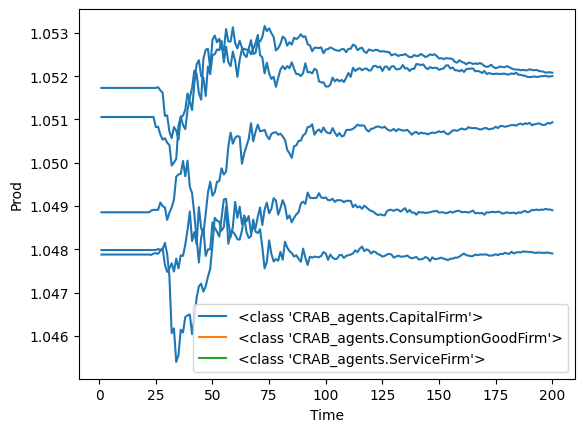

In [ ]:
# Plot average productivity per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod", color="tab:green")
plt.show()

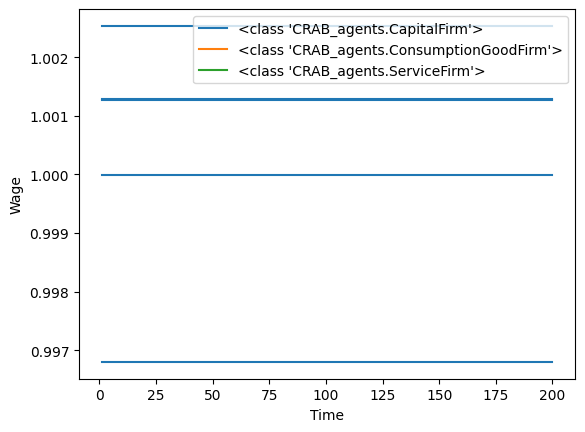

In [ ]:
# Plot wages
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

#### Inventories

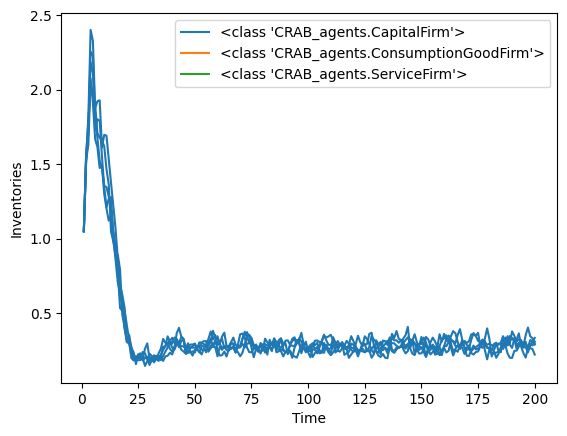

In [ ]:
# Plot inventory level
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
plt.show()

# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
# plt.show()

##### Production made

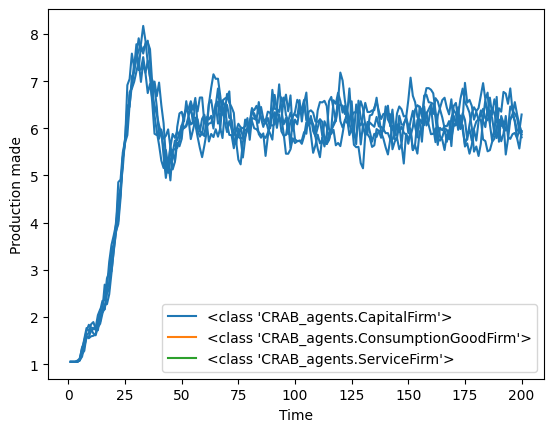

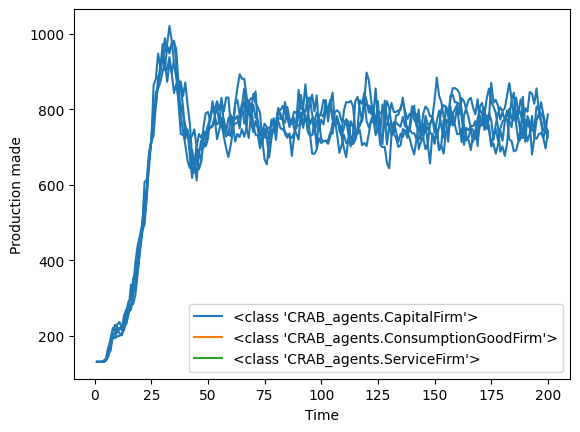

In [ ]:
# Plot production made
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Production made", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Production made", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Production made", color="tab:green")
plt.show()

plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Production made", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Production made", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Production made", color="tab:green")
plt.show()

##### Excess production

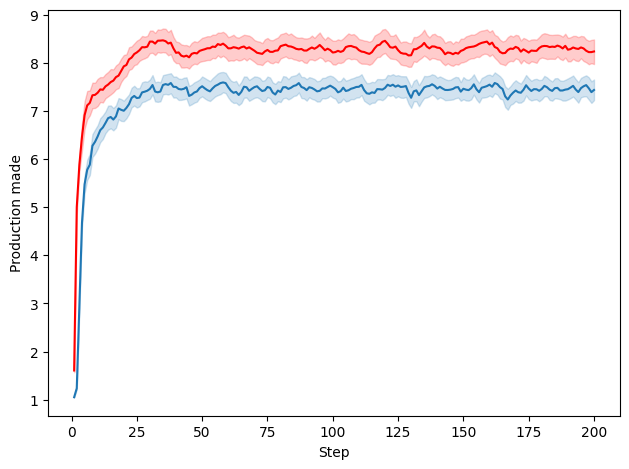

In [ ]:

sns.lineplot( data = agent_vars_df_list[0], x = 'Step', y = 'Production made', legend=True)
sns.lineplot( data = agent_vars_df_list[0], x = 'Step', y = 'Real demand', legend=True, color='red')

plt.tight_layout()
plt.show()

<Axes: xlabel='Step', ylabel='Excess production'>

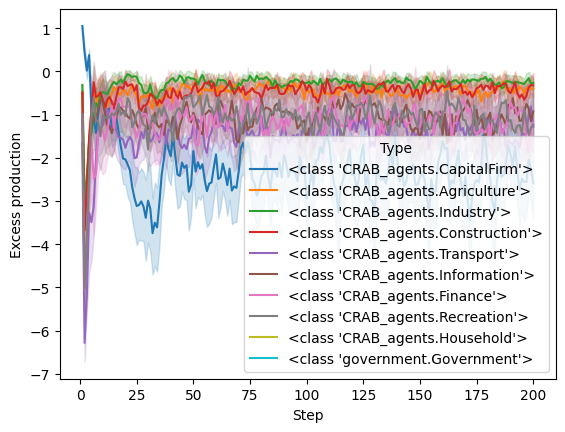

In [ ]:
# Plot excess production (production made - real demand)
for df in agent_vars_df_list:
    df["Excess production"] = df["Production made"] - df["Real demand"]
sns.lineplot( data=df, x='Step', y="Excess production", hue="Type")

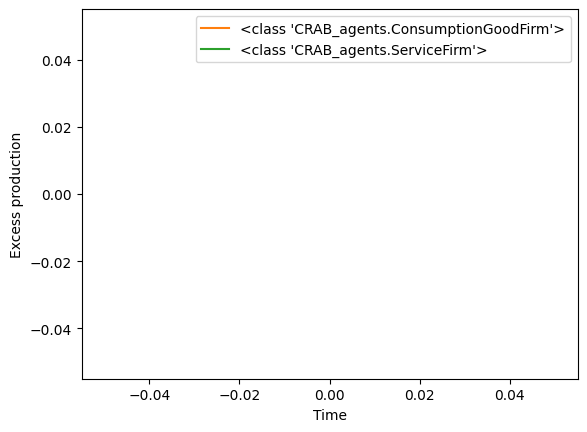

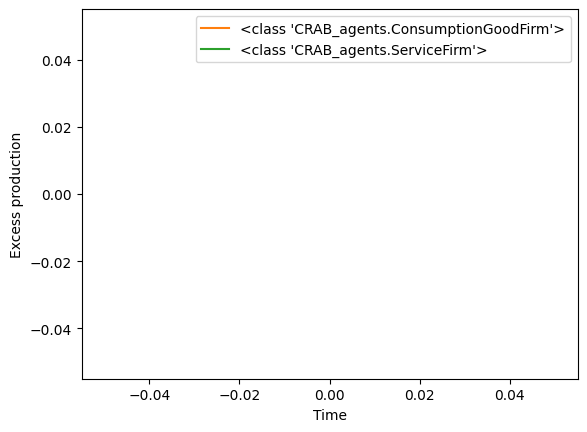

Step  AgentID                                Type     Price  \
0           1        1   <class 'CRAB_agents.CapitalFirm'>  1.202000   
1           1        2   <class 'CRAB_agents.CapitalFirm'>  1.207000   
2           1        3   <class 'CRAB_agents.CapitalFirm'>  1.230000   
3           1        4   <class 'CRAB_agents.CapitalFirm'>  1.308000   
4           1        5   <class 'CRAB_agents.CapitalFirm'>  1.271000   
...       ...      ...                                 ...       ...   
2255195   200    12856  <class 'CRAB_agents.Construction'>  1.221133   
2255196   200    12857     <class 'CRAB_agents.Transport'>  1.207019   
2255197   200    12858   <class 'CRAB_agents.Information'>  1.232223   
2255198   200    12859       <class 'CRAB_agents.Finance'>  1.210635   
2255199   200    12860    <class 'CRAB_agents.Recreation'>  1.246254   

         Market share   Prod  Inventories  N ordered  Production made  \
0               0.008  1.074         1.07        0.0             1.07   
1               0.008  1.051         1.05        0.0             1.05   
2               0.008  1.048         1.05        0.0             1.05   
3               0.008  0.997         1.00        0.0             1.00   
4               0.008  1.042         1.04        0.0             1.04   
...               ...    ...          ...        ...              ...   
2255195         0.000  1.051         0.00        0.0             1.00   
2255196         0.000  1.051         0.00        0.0             1.00   
2255197         0.000  1.051         0.00        0.0             1.00   
2255198         0.000  1.051         0.00        0.0             1.00   
2255199         0.000  1.051         0.00        0.0             1.00   

         Feasible production  ...   Net worth  Debt  Size  Labor demand  \
0                        1.0  ...  150.000000   0.0   1.0           1.0   
1                        1.0  ...  150.000000   0.0   1.0           1.0   
2                        1.0  ...  150.000000   0.0   1.0           1.0   
3                        1.0  ...  150.000000   0.0   1.0           1.0   
4                        1.0  ...  150.000000   0.0   1.0           1.0   
...                      ...  ...         ...   ...   ...           ...   
2255195                  NaN  ...   62.528924   NaN   0.0           NaN   
2255196                  NaN  ...  104.745483   NaN   0.0           NaN   
2255197                  NaN  ...   88.496419   NaN   0.0           NaN   
2255198                  NaN  ...  103.044842   NaN   0.0           NaN   
2255199                  NaN  ...   16.924313   NaN   0.0           NaN   

         Capital amount    Demand  Additional labor demand  Prod/wage  \
0                  60.0  0.000000                      0.0   1.081782   
1                  48.0  0.000000                      0.0   1.077207   
2                  57.0  0.000000                      0.0   1.057005   
3                  54.0  0.000000                      0.0   0.993869   
4                  54.0  0.000000                      0.0   1.023349   
...                 ...       ...                      ...        ...   
2255195             6.0  1.221133                      NaN   0.985929   
2255196             7.0  1.207019                      NaN   1.035468   
2255197             6.0  1.232223                      NaN   0.989642   
2255198             4.0  1.210635                      NaN   1.032417   
2255199             2.0  1.246254                      NaN   1.006705   

         Excess production  Cum excess production  
0                     1.07                  1.070  
1                     1.05                  2.120  
2                     1.05                  3.170  
3                     1.00                  4.170  
4                     1.04                  5.210  
...                    ...                    ...  
2255195               0.00              16648.092  
2255196               0.00              23236.736  
2255197              

In [ ]:
# Plot excess production (production made - real demand)
for df in agent_vars_df_list:
    df["Excess production"] = df["Production made"] - df["Real demand"]
# plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Excess production", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Excess production", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Excess production", color="tab:green")
plt.show()

# plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Excess production", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Excess production", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Excess production", color="tab:green")
plt.show()

for df in agent_vars_df_list:
    df[df["Excess production"] < 0] = 0
    df["Cum excess production"] = df.groupby("Type")["Excess production"].cumsum()

df

#### MACHINES

##### Capital (average per sector)

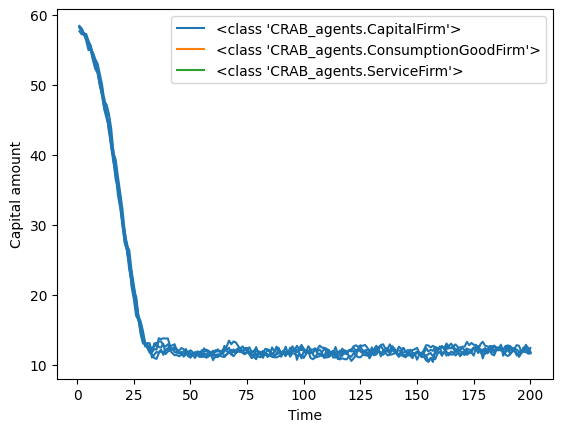

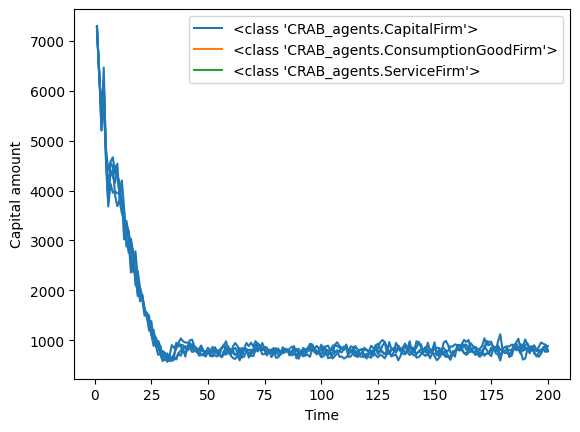

In [ ]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.show()

# Plot difference between desired machines and ordered machines (sum)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.show()

##### Capital demand (average per sector)

In [ ]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital desired", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital desired", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital desired", color="tab:green")
plt.show()

# Plot difference between desired machines and ordered machines (sum)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital desired", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital desired", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital desired", color="tab:green")
plt.show()

KeyError: 'Column not found: Capital desired'

##### Orders per sector

In [ ]:
# Plot orders per sector (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital ordered", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital ordered", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital ordered", color="tab:green")
plt.show()

# Plot orders per sector (sum)
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital ordered", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital ordered", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital ordered", color="tab:green")
plt.show()

##### Supplier changes

In [ ]:
# Plot number of firms that changed supplier per timestep
plot_all_runs(model_vars_df_list, "Changed supplier cap", color="tab:blue")
plot_all_runs(model_vars_df_list, "Changed supplier cons", color="tab:orange")
plot_all_runs(model_vars_df_list, "Changed supplier serv", color="tab:green")
plt.show()

##### Machine end of lifetime

In [ ]:
# Plot number of machines died every timestep
plot_all_runs(model_vars_df_list, "Frac machines dead")